In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
#Importando a base de treino
treinodf = pd.read_csv('horse.csv')
treinodf.head(20)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,slight,none,NaN,decreased,firm,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,none,none,NaN,decreased,distend_large,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,NaN,absent,slight,slight,none,NaN,decreased,distend_small,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,slight,none,NaN,decreased,distend_large,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,extreme_pain,hypomotile,none,slight,none,NaN,decreased,NaN,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [3]:
#Importando a base de teste
testedf = pd.read_csv('horseTest.csv')
treinodf.head(20)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,slight,none,NaN,decreased,firm,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,none,none,NaN,decreased,distend_large,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,NaN,absent,slight,slight,none,NaN,decreased,distend_small,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,slight,none,NaN,decreased,distend_large,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,extreme_pain,hypomotile,none,slight,none,NaN,decreased,NaN,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


Exclusão de Hospital_number e respiratory_rate uma vez que são dados irrelevantes de acordo com o dicionário de dados.

In [4]:
#Exclusão das colunas no ambiente de treino
treinodf = treinodf.loc[:,treinodf.columns != 'hospital_number']
treinodf = treinodf.loc[:,treinodf.columns != 'respiratory_rate']
treinodf.head()

,surgery,age,rectal_temp,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
#Exclusão das colunas no ambiente de teste
testedf = testedf.loc[:,testedf.columns != 'hospital_number']
testedf = testedf.loc[:,testedf.columns != 'respiratory_rate']
testedf.head()

,surgery,age,rectal_temp,pulse,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,37.3,104.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,39.1,72.0,warm,NaN,bright_pink,less_3_sec,depressed,hypermotile,slight,none,none,NaN,absent,distend_small,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,37.2,42.0,warm,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_large,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,38.0,92.0,normal,normal,bright_pink,less_3_sec,alert,hypomotile,slight,significant,NaN,7.2,normal,normal,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,37.6,64.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,none,NaN,increased,distend_large,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


Descrição da base de treino

In [6]:
treinodf.describe()

,rectal_temp,pulse,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,239.000000,275.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,38.168619,72.000000,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,0.733744,28.646219,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,35.400000,30.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,37.800000,48.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,38.200000,64.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,38.500000,88.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,40.800000,184.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


Análise exploratória

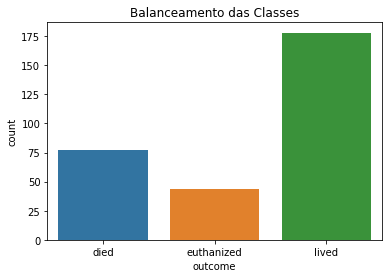

In [7]:
sns.countplot(x=treinodf.outcome);
plt.title("Balanceamento das Classes")
plt.show()

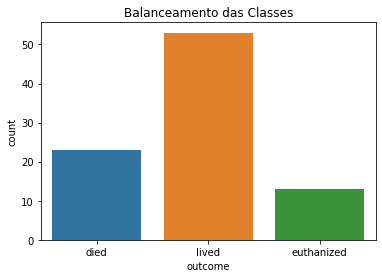

In [8]:
sns.countplot(x=testedf.outcome);
plt.title("Balanceamento das Classes")
plt.show()

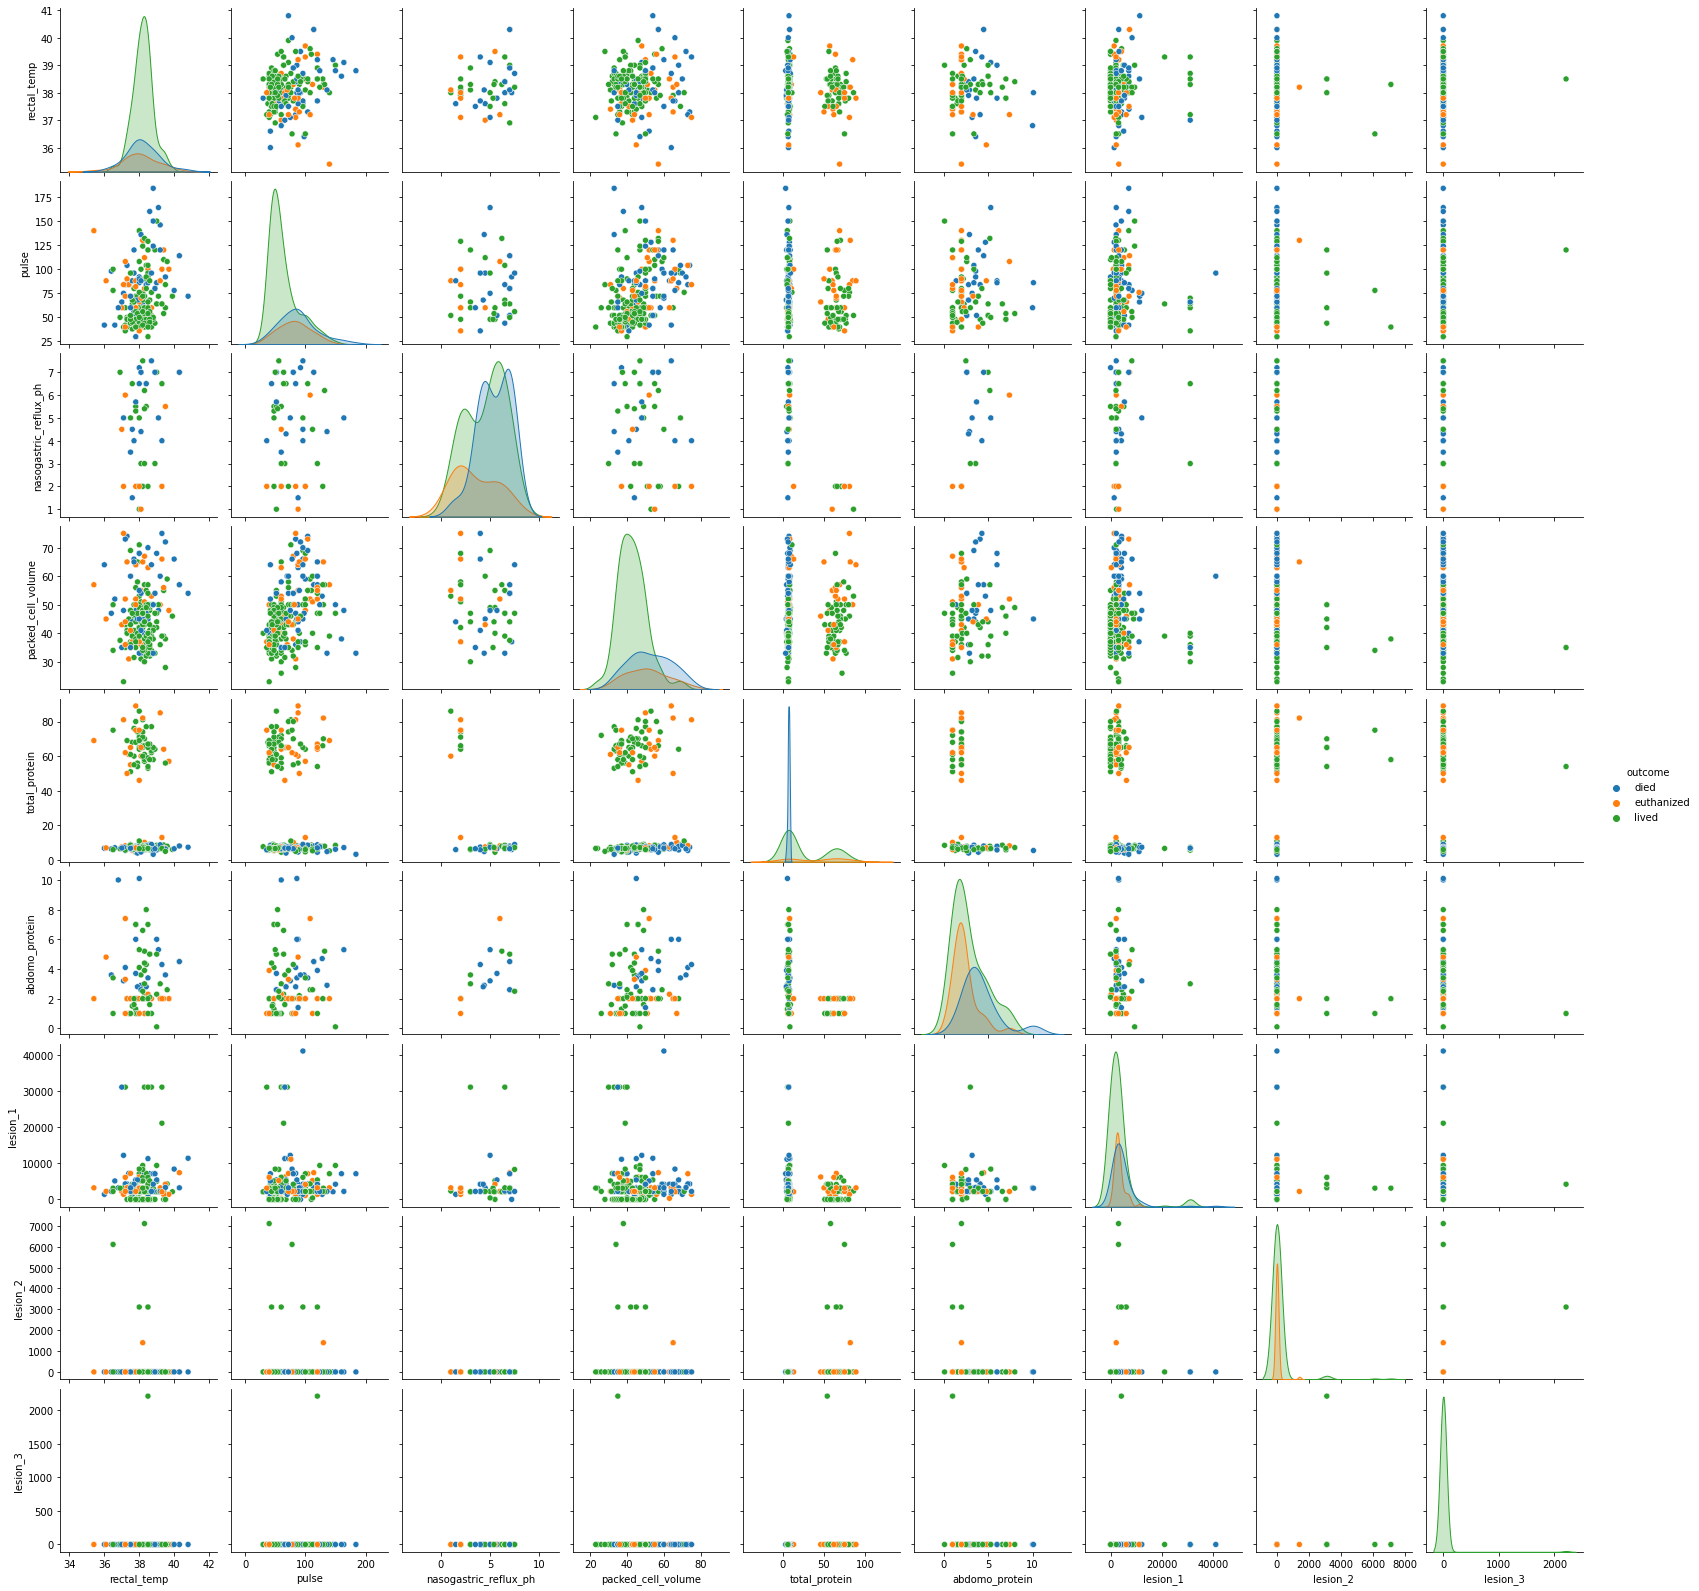

In [9]:
#Dispersão entre atributos 

sns.pairplot(treinodf, hue='outcome')

Sugestão de exclusão de colunas lesion_2 e lesion_3 pq a maioria dos valores são "zero" e de acordo com o gráfico de dispesão em relação à classe , se torna irrelevante

In [10]:
#Exclusão das colunas no ambiente de treino
treinodf = treinodf.loc[:,treinodf.columns != 'lesion_2']
treinodf = treinodf.loc[:,treinodf.columns != 'lesion_3']

In [11]:
#Exclusão das colunas no ambiente de teste
testedf = testedf.loc[:,testedf.columns != 'lesion_2']
testedf = testedf.loc[:,testedf.columns != 'lesion_3']

Sugestão de exclusão da coluna lesion_1 (modelo entendendo como atributo numérico, podendo prejudicar na inferência)


In [12]:
#Exclusão das colunas no ambiente de treino e teste
#treinodf = treinodf.loc[:,treinodf.columns != 'lesion_1']
#testedf = testedf.loc[:,testedf.columns != 'lesion_1']

Sugestão de exclusão da coluna cp_data, uma vez que o dicionário de dados classifica como um dado não significante

In [13]:
#Exclusão das colunas no ambiente de treino e teste
treinodf = treinodf.loc[:,treinodf.columns != 'cp_data']
testedf = testedf.loc[:,testedf.columns != 'cp_data']

Verificação de Missings

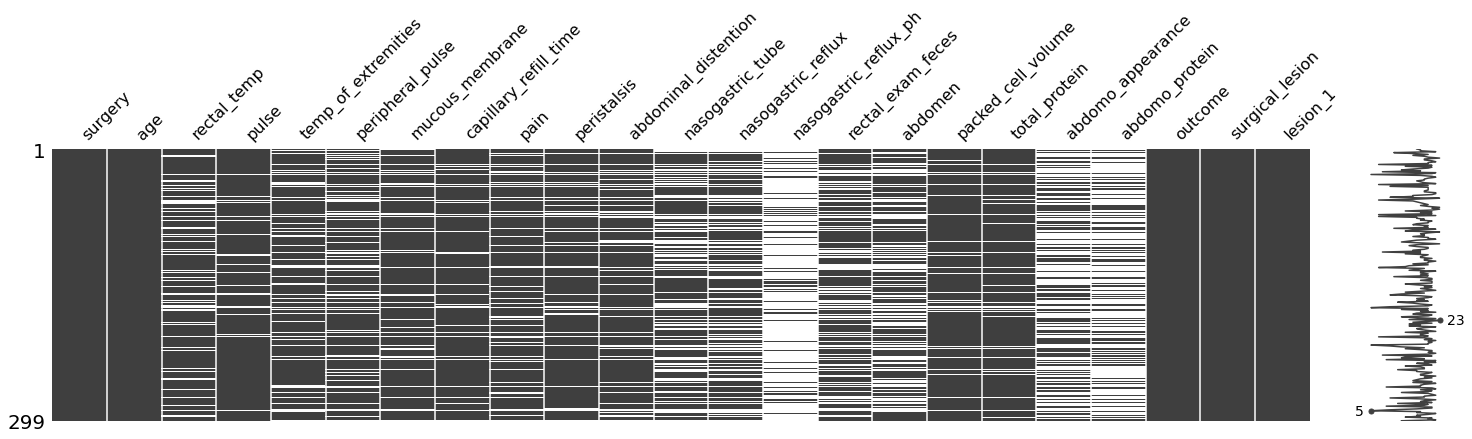

In [14]:
# Visualizar missing
import missingno as msno
msno.matrix(treinodf, figsize=(25,5));

In [15]:
treinodf.isnull().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
dtype: int64

Por excesso de nulos, sugestão de excluir os atributos nasogastric_reflux_ph , abdomo_appearance e abdomo_protein

In [16]:
#Exclusão das colunas no ambiente de treino
treinodf = treinodf.loc[:,treinodf.columns != 'nasogastric_reflux_ph']
treinodf = treinodf.loc[:,treinodf.columns != 'abdomo_appearance']
treinodf = treinodf.loc[:,treinodf.columns != 'abdomo_protein']

In [17]:
#Exclusão das colunas no ambiente de teste
testedf = testedf.loc[:,testedf.columns != 'nasogastric_reflux_ph']
testedf = testedf.loc[:,testedf.columns != 'abdomo_appearance']
testedf = testedf.loc[:,testedf.columns != 'abdomo_protein']

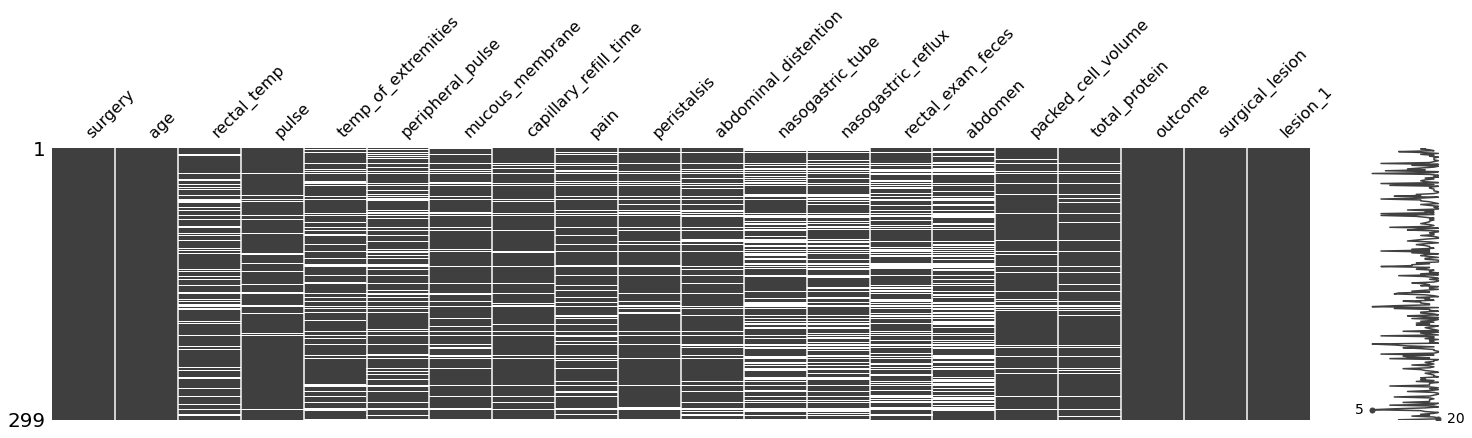

In [18]:
# Visualizar missing depois da exclusão dos atributos
import missingno as msno
msno.matrix(treinodf, figsize=(25,5));

In [19]:
#Separar inputs e outputs para as bases de treino e teste
X_treinodf = treinodf.loc[:,treinodf.columns != 'outcome'] #Entrada
Y_treinodf = treinodf.outcome    # Saída
X_testedf = testedf.loc[:,testedf.columns != 'outcome'] #Entrada
Y_testedf = testedf.outcome    # Saída

In [20]:
print(X_treinodf.shape)
print(X_testedf.shape)
print(Y_treinodf.shape)
print(Y_testedf.shape)

(299, 19)
(89, 19)
(299,)
(89,)


In [21]:
#Selecionando as colunas numéricas e categóricas
#Fonte: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude = object)
categorical_columns_selector = selector(dtype_include = object)

numerical_columns = numerical_columns_selector(X_treinodf)
categorical_columns = categorical_columns_selector(X_treinodf)

In [22]:
X_treinodf[categorical_columns]

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,surgical_lesion
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,no
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,yes
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,yes


In [23]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(strategy="most_frequent")
imp_num = SimpleImputer(strategy="mean")

In [24]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('simple-imp-cat', imp_cat, categorical_columns),
    ('simple-imp-num', imp_num, numerical_columns)])

In [25]:
preprocessor.fit(X_treinodf)

ColumnTransformer(transformers=[('simple-imp-cat',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['surgery', 'age', 'temp_of_extremities',
                                  'peripheral_pulse', 'mucous_membrane',
                                  'capillary_refill_time', 'pain',
                                  'peristalsis', 'abdominal_distention',
                                  'nasogastric_tube', 'nasogastric_reflux',
                                  'rectal_exam_feces', 'abdomen',
                                  'surgical_lesion']),
                                ('simple-imp-num', SimpleImputer(),
                                 ['rectal_temp', 'pulse', 'packed_cell_volume',
                                  'total_protein', 'lesion_1'])])

In [26]:
#Tratando os missing values nas bases de treino e teste
preprocessor.fit(X_treinodf)
X_treinodf = preprocessor.transform(X_treinodf)
X_testedf = preprocessor.transform(X_testedf)

In [27]:
colunas = categorical_columns + numerical_columns

In [28]:
#Transfomando as bases novamente em dataframes após o tratamento de missing values
X_treinodf = pd. DataFrame(X_treinodf, columns=colunas)
X_testedf = pd. DataFrame(X_testedf, columns=colunas)

In [29]:
X_treinodf.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,surgical_lesion,rectal_temp,pulse,packed_cell_volume,total_protein,lesion_1
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,no,38.5,66,45,8.4,11300
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,no,39.2,88,50,85,2208
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,no,38.3,40,33,6.7,0
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,yes,39.1,164,48,7.2,2208
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,no,37.3,104,74,7.4,4300


In [30]:
X_treinodf.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
surgical_lesion          0
rectal_temp              0
pulse                    0
packed_cell_volume       0
total_protein            0
lesion_1                 0
dtype: int64

In [31]:
X_testedf.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
surgical_lesion          0
rectal_temp              0
pulse                    0
packed_cell_volume       0
total_protein            0
lesion_1                 0
dtype: int64

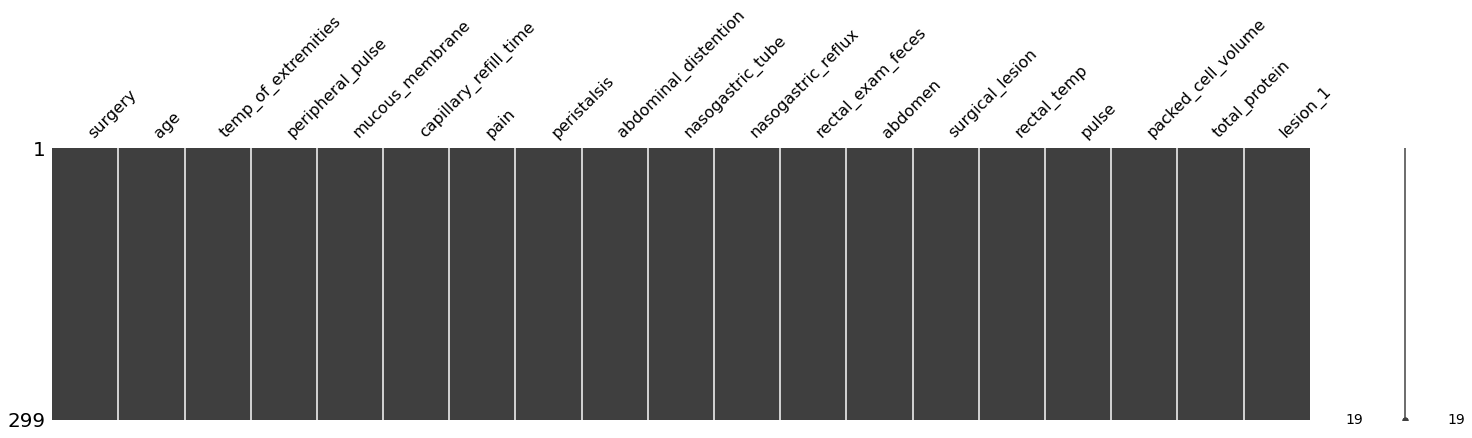

In [32]:
msno.matrix(X_treinodf, figsize=(25,5));

In [33]:
X_treinodf.dtypes

surgery                  object
age                      object
temp_of_extremities      object
peripheral_pulse         object
mucous_membrane          object
capillary_refill_time    object
pain                     object
peristalsis              object
abdominal_distention     object
nasogastric_tube         object
nasogastric_reflux       object
rectal_exam_feces        object
abdomen                  object
surgical_lesion          object
rectal_temp              object
pulse                    object
packed_cell_volume       object
total_protein            object
lesion_1                 object
dtype: object

In [34]:
numerical_columns

['rectal_temp', 'pulse', 'packed_cell_volume', 'total_protein', 'lesion_1']

In [35]:
#Reconfigurando os tipos de dados (atributos numéricos para float)
X_treinodf[numerical_columns] = X_treinodf[numerical_columns].astype('float64')
X_testedf[numerical_columns] = X_testedf[numerical_columns].astype('float64')

In [36]:
X_treinodf.dtypes

surgery                   object
age                       object
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
surgical_lesion           object
rectal_temp              float64
pulse                    float64
packed_cell_volume       float64
total_protein            float64
lesion_1                 float64
dtype: object

In [37]:
X_testedf.dtypes

surgery                   object
age                       object
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
surgical_lesion           object
rectal_temp              float64
pulse                    float64
packed_cell_volume       float64
total_protein            float64
lesion_1                 float64
dtype: object

In [38]:
#Importando o OrdinalEncoder para transformar atributos categóricos em numéricos
#Importando StandardScaler para normalizar atributos numéricos
#Fonte: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder() #handle_unknown="ignore"
#categorical_preprocessor = OneHotEncoder(drop='first')
numerical_preprocessor = StandardScaler()

In [39]:
#Considerando somente a transformação dos atributos categóricos, sem normalizar atributos numéricos
preprocessor = ColumnTransformer([
    ('ordinal-encoder', categorical_preprocessor, categorical_columns)],remainder='passthrough')

In [40]:
#Dataframes auxiliares para verificar resultado sem normalização
X_treinodf_sem_norm = X_treinodf
X_testedf_sem_norm = X_testedf

In [41]:
#Transformação atributos categóricos utilzando OrdinalEncoder
preprocessor.fit(X_treinodf_sem_norm)
X_treinodf_sem_norm = preprocessor.transform(X_treinodf_sem_norm)
X_testedf_sem_norm = preprocessor.transform(X_testedf_sem_norm)

In [42]:
pd.DataFrame(X_treinodf_sem_norm).head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,38.500000,66.0,45.000000,8.400000,11300.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,39.200000,88.0,50.000000,85.000000,2208.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,0.0,38.300000,40.0,33.000000,6.700000,0.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,39.100000,164.0,48.000000,7.200000,2208.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,37.300000,104.0,74.000000,7.400000,4300.0
5,0.0,0.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,0.0,38.168619,72.0,46.307407,24.274436,0.0
6,1.0,0.0,2.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,37.900000,48.0,37.000000,7.000000,3124.0
7,1.0,0.0,1.0,2.0,3.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,1.0,38.168619,60.0,44.000000,8.300000,2208.0
8,0.0,0.0,1.0,0.0,5.0,1.0,4.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,38.168619,80.0,38.000000,6.200000,3205.0
9,0.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,38.300000,90.0,40.000000,6.200000,0.0


# Treinamento do Modelo

In [43]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def functreino(X_treinodf, Y_treinodf, seed):
  model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_treinodf, Y_treinodf)     # treino o modelo
  return model

In [44]:
model = functreino(X_treinodf_sem_norm, Y_treinodf, seed)

In [45]:
colunas = categorical_columns + numerical_columns

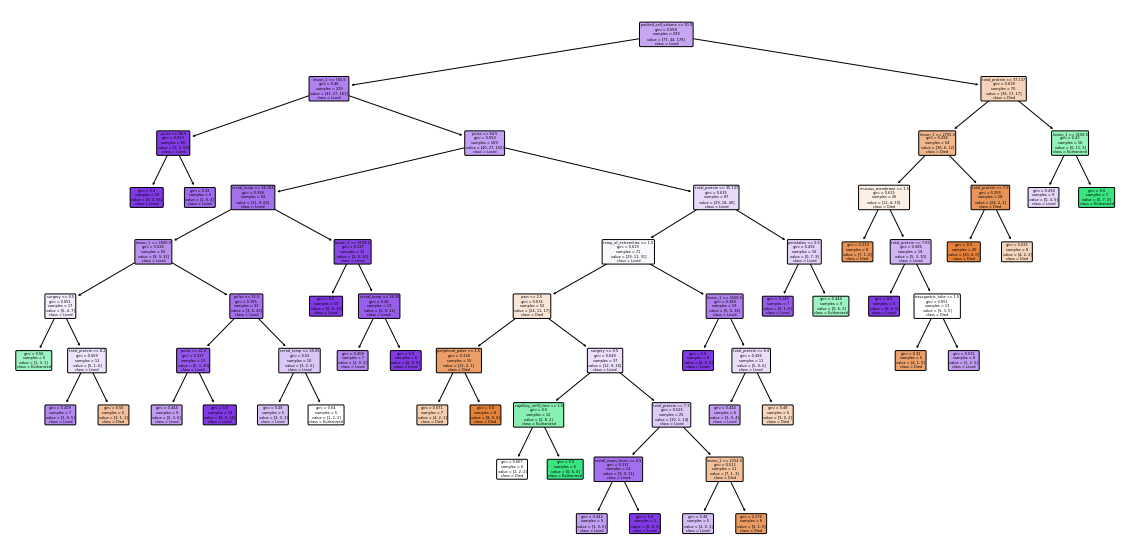

In [46]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Died', 'Euthanized', 'Lived'], filled=True, rounded=True, feature_names=colunas); # plota a árvore
plt.savefig('tree_high_dpi-300', dpi=300)

# Inferência

In [47]:
def predict_and_evaluate(model, X_testedf, Y_testedf):

  Y_pred = model.predict(X_testedf) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(Y_testedf, Y_pred)
  print('Acurácia: ', accuracy)

 # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(Y_testedf, Y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(Y_testedf, Y_pred, average=None)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(Y_testedf, Y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Euthanized', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Euthanized', 'Lived'])
  plt.show()


Resultados de Treino
Acurácia:  0.8294314381270903
Kappa:  0.6845795842382874
F1:  [0.77419355 0.63157895 0.89373297]


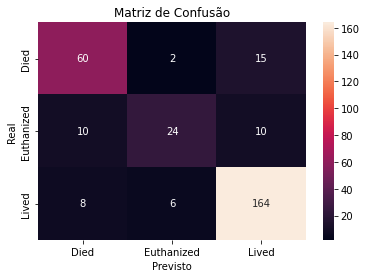

Resultados de Teste
Acurácia:  0.8202247191011236
Kappa:  0.6706753006475485
F1:  [0.74418605 0.69230769 0.88073394]


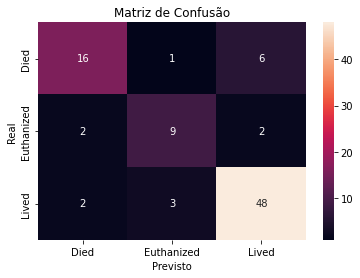

In [48]:
print('Resultados de Treino')
predict_and_evaluate(model, X_treinodf_sem_norm, Y_treinodf)
print('Resultados de Teste')
predict_and_evaluate(model, X_testedf_sem_norm, Y_testedf)

# Normalizando as bases

In [49]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('ordinal-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])


In [50]:
#Transformando atributos categóricos e normalizando atributos numéricos na base de treino e teste
preprocessor.fit(X_treinodf)
X_treinodf = preprocessor.transform(X_treinodf)
X_testedf = preprocessor.transform(X_testedf)

In [51]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_treinodf)
#X_treinodf = scaler.transform(X_treinodf)
#X_testedf = scaler.transform(X_testedf)

In [52]:
X_treinodf.shape

(299, 19)

In [53]:
pd.DataFrame(X_treinodf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.506209,-0.218798,-0.132070,-0.616209,1.415021
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,1.575511,0.583463,0.373015,2.357228,-0.268864
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,0.0,0.200694,-1.166925,-1.344274,-0.682199,-0.677797
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.422753,3.354910,0.170981,-0.662791,-0.268864
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,-1.326880,1.166925,2.797423,-0.655027,0.118585


In [54]:
X_testedf.shape

(89, 19)

In [55]:
pd.DataFrame(X_testedf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,-1.326880,1.166925,2.797423,-0.655027,0.118585
1,0.0,0.0,3.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.422753,0.000000,0.373015,-0.639500,-0.286829
2,1.0,0.0,3.0,2.0,3.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,-1.479638,-1.093992,0.000000,-0.670554,0.085989
3,0.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,3.0,3.0,0.0,-0.257578,0.729328,-0.940206,-0.705490,-0.677797
4,1.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,-0.868608,-0.291731,-0.637155,-0.670554,0.100991


In [56]:
model = functreino(X_treinodf, Y_treinodf, seed)

Resultados de Treino
Acurácia:  0.8294314381270903
Kappa:  0.6845795842382874
F1:  [0.77419355 0.63157895 0.89373297]


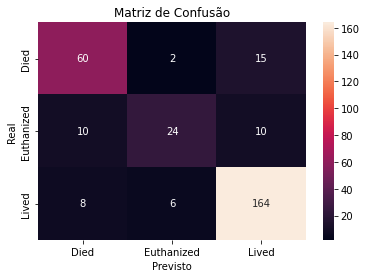

Resultados de Teste
Acurácia:  0.8202247191011236
Kappa:  0.6706753006475485
F1:  [0.74418605 0.69230769 0.88073394]


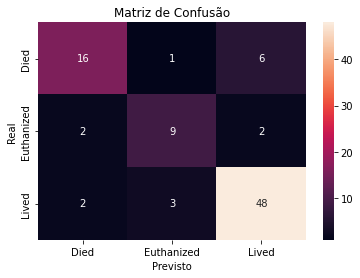

In [57]:
print('Resultados de Treino')
predict_and_evaluate(model, X_treinodf, Y_treinodf)
print('Resultados de Teste')
predict_and_evaluate(model, X_testedf, Y_testedf)

# Balanceando base de treino fazendo over-sampling da classe Euthanized

In [58]:
train_data = np.column_stack((X_treinodf,Y_treinodf))
np.random.shuffle(train_data)

In [59]:
train_data.shape

(299, 20)

In [60]:
lived = train_data[train_data[:,19] == 'lived',:]
died = train_data[train_data[:,19] == 'died',:]
euthanized = train_data[train_data[:,19] == 'euthanized',:]
print(lived.shape)
print(died.shape)
print(euthanized.shape)

(178, 20)
(77, 20)
(44, 20)


In [61]:
#Duplicando o número de euthanized
euthanized = np.concatenate((euthanized, euthanized))
print(euthanized.shape)

(88, 20)


In [62]:
train_data = np.concatenate((lived, died, euthanized))
np.random.shuffle(train_data)
train_data.shape

(343, 20)

In [63]:
# Separar input e output
X_treinodf = train_data[:,0:19]
Y_treinodf = train_data[:,19]

In [64]:
pd.DataFrame(Y_treinodf).value_counts()

lived         178
euthanized     88
died           77
dtype: int64

Resultados de Treino
Acurácia:  0.8483965014577259
Kappa:  0.7612188068972904
F1:  [0.79761905 0.85561497 0.87009063]


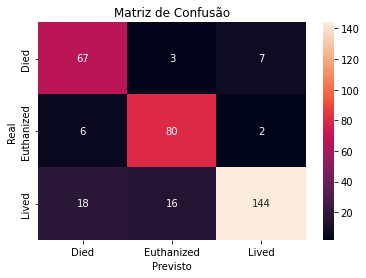

Resultados de Teste
Acurácia:  0.8202247191011236
Kappa:  0.7035803497085762
F1:  [0.82352941 0.75       0.84210526]


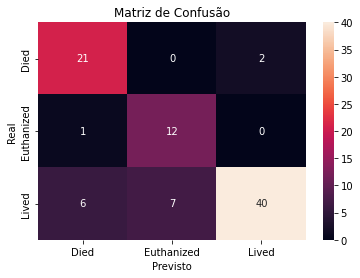

In [65]:
model = functreino(X_treinodf, Y_treinodf, seed)
print('Resultados de Treino')
predict_and_evaluate(model, X_treinodf, Y_treinodf)
print('Resultados de Teste')
predict_and_evaluate(model, X_testedf, Y_testedf)

# Grid Search

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_weighted')

#model = GridSearchCV(SVC(random_state=seed), tuned_parameters, scoring='f1_weighted')
#scoring='f1' estava dando erro por ser multiclasses, alterado para f1_weighted
#Fonte: https://scikit-learn.org/stable/modules/model_evaluation.html

model.fit(X_treinodf, Y_treinodf)

y_true, y_pred = Y_testedf, model.predict(X_testedf)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

        died       0.96      0.96      0.96        23
  euthanized       1.00      1.00      1.00        13
       lived       0.98      0.98      0.98        53

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89




In [67]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

In [68]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Acurácia:  0.9775280898876404
Kappa:  0.9596737652922519
F1:  [0.95652174 1.         0.98113208]


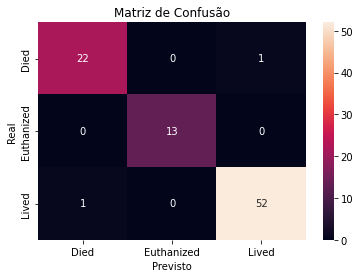

In [69]:
predict_and_evaluate(model, X_testedf, Y_testedf)

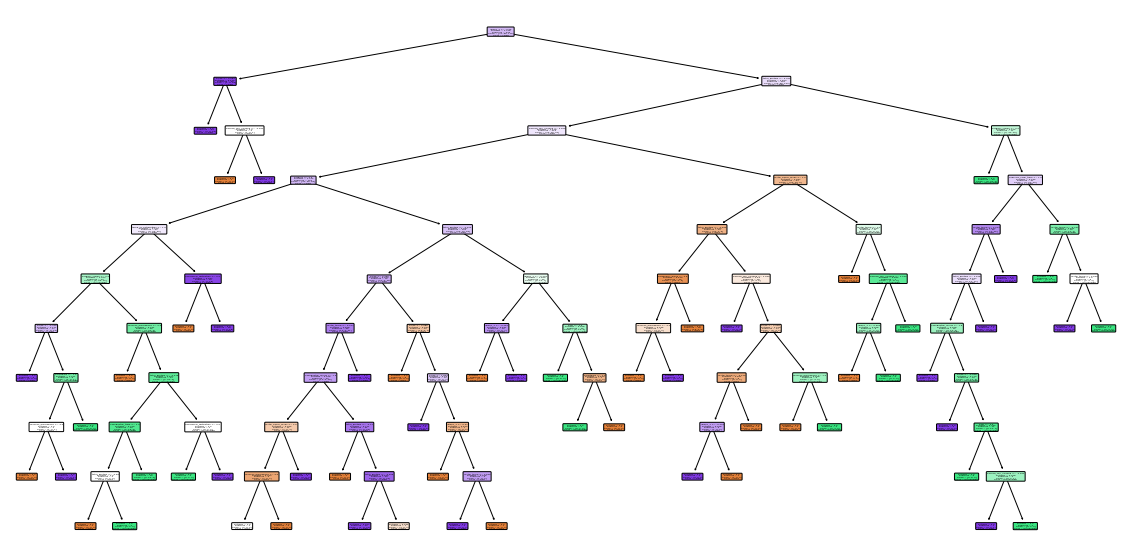

In [70]:
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model.best_estimator_, class_names=['Died', 'Euthanized', 'Lived'], filled=True, rounded=True, feature_names=colunas); # plota a árvore
plt.savefig('tree_high_dpi-300-Grid-Search', dpi=300)
#Fonte: https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small